# **Librerias**

In [ ]:
# Importamos las Librerias 

import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

# Versiones 

print(f'Numpy Version: {np.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.3.1
Scipy Version: 1.16.1
Scikit-Learn Version: 1.7.1
Matplotlib Version: 3.10.3


# **Normal Multivariante (MVN)**

La **funcion de densidad de probabilidad** (PDF) de una distribucion normal multivariante (MVN) es la siguiente:

$$\mathcal{N}(x \mid \mu, \Sigma) = \frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)}$$ 

En donde 

* $\mu$: es el vector de medias

* $\Sigma$: es la matriz de covarianza y es simetrica definida positiva

* $|\Sigma|$: es el determinante de la matriz de covarianza

* $\Sigma^{-1}$: es la inversa de la matriz de covarianza

La **matriz de covarianza** es **simetrica definida positiva** por lo tanto admite una **descomposicion espectral**

$$\Sigma = \text{U} \Lambda \text{U}^T$$

En donde 

* $\text{U}$: es una matriz ortogonal cuyas columnas son los eigenvectores de $\Sigma$

* $\Lambda$: es una matriz diagonal con los eigenvalores de $\Sigma$,  $\lambda_i > 0$ ya que $\Sigma \succ 0$

* Debido a la ortogonalidad $\text{U}^T \text{U} = \text{I} \rightarrow \text{U}^{-1} = \text{U}^T$

La **inversa de la matriz de covarianza** podemos calcularla aprovechandonos de la **descomposicion espectral**

$$\Sigma^{-1} = \left(\text{U} \Lambda \text{U}^T \right)^{-1}= \text{U}^{-T} \Lambda^{-1} \text{U}^{-1} = \text{U} \Lambda^{-1} \text{U}^T = \sum_{i = 1}^D \frac{1}{\lambda_i} u_i u_i^T$$

* $u_i u_i^T$: producto externo

* $\Sigma^{-1}$: es una matriz simetrica

La expresion dentro del exponente de la **distribucion** es la **Distancia de Mahalanobis**, no es mas que la distancia entre el **vector** $x \in \mathbb{R}^D$ y el **vector de medias** $\mu$ de la **distribucion**

$$(x - \mu)^T \Sigma^{-1} (x - \mu) = (x - \mu)^T \left(\sum_{i = 1}^D \frac{1}{\lambda_i} u_i u_i^T\right) (x - \mu)$$
$$(x - \mu)^T \Sigma^{-1} (x - \mu) = \sum_{i = 1}^D \frac{1}{\lambda_i} (x - \mu)^T u_i u_i^T (x - \mu)$$
$$(x - \mu)^T \Sigma^{-1} (x - \mu) = \sum_{i = 1}^D \frac{y_i^2}{\lambda_i}$$

En donde 

* $y_i = u_i^T (x - \mu)$ es la proyeccion $(x - \mu)$ sobre el eigenvector $u_i$

* La sumatoria de la proyeccion del punto $x$ a los ejes de los eigenvectores $y_i = u_i^T (x - \mu)$ al cuadrado, divididos por los eigenvalores $\lambda_i$ forma la ecuacion del **elipsoide** de **Distancia de Mahalanobis** igual a $1 \rightarrow$ $\frac{y_1^2}{\lambda_1} + \frac{y_2^2}{\lambda_2} = 1$

* Los **contornos de igual densidad de la distribuccion normal multivariante** corresponden a **contornos de igual distancia de Mahalanobis**

**Nota:** La **Distancia de Mahalanobis** no es mas que la **Distancia Euclidiana** en un **sistema de coordenadas transformado** (Sistema de coordenadas de los eigenvectores)

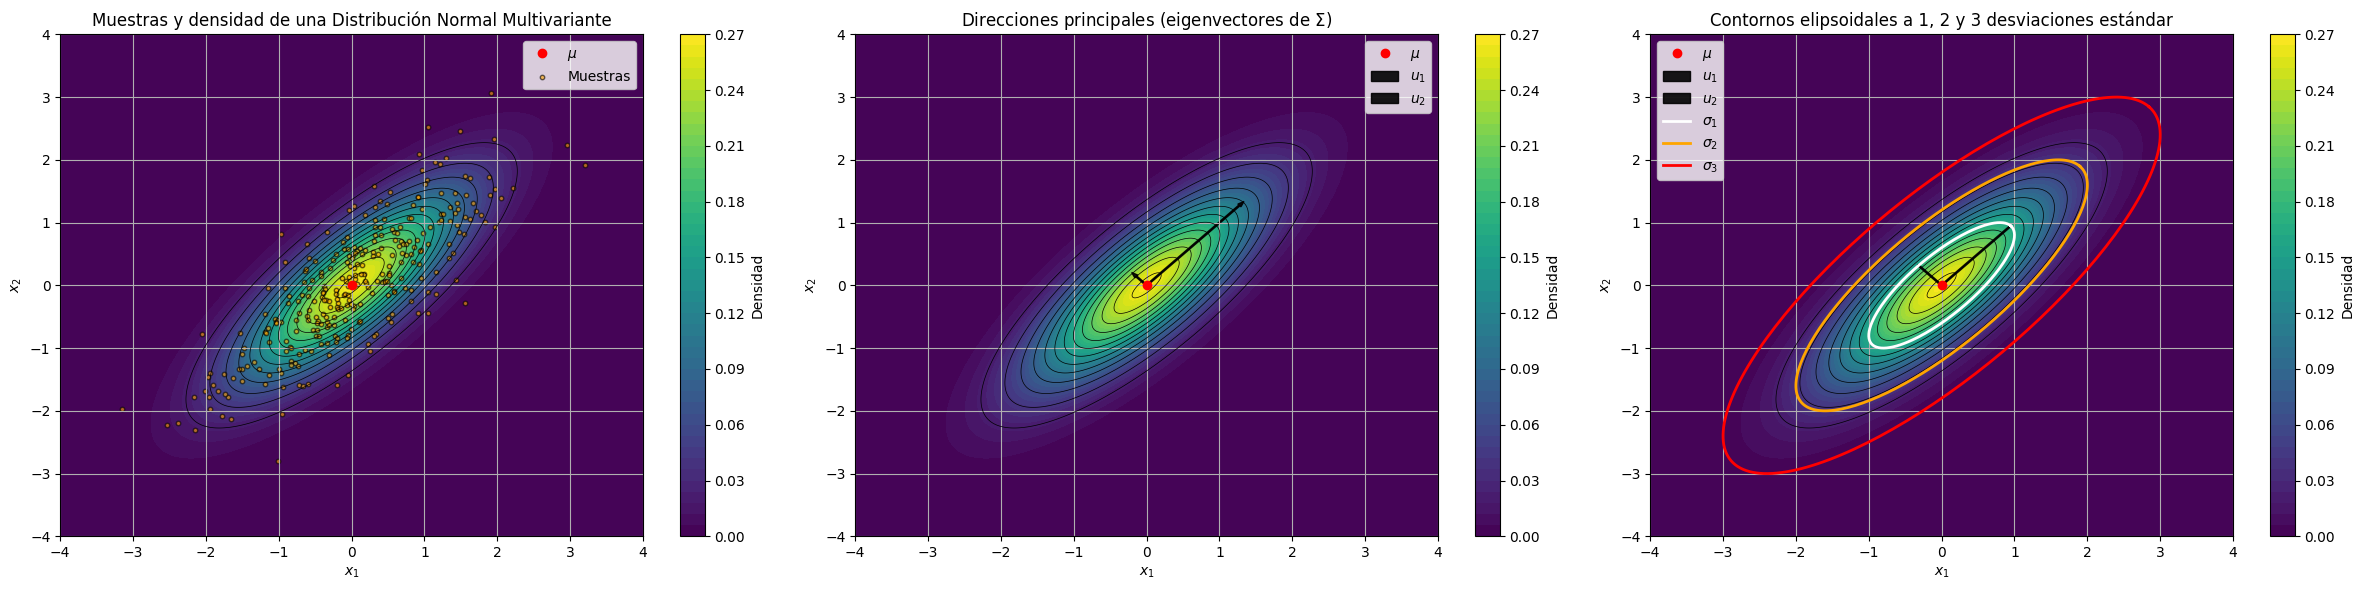

In [2]:
# Definimos el Vector de Medias y la Matriz de Covarianza

mu = np.array([0, 0])
sigma = np.array([[1, 0.8], [0.8, 1]])

# Definimos la Distribucion Normal Multivariante 

rv = multivariate_normal(mean = mu, cov = sigma) 

# Definimos unas Muestras Provenientes de esta distribucion 

samples = rv.rvs(size = 300)

# Definimos el Dominio de la Distribucion Normal Multivariante

x = np.linspace(-4, 4, 1000) 
y = np.linspace(-4, 4, 1000) 

X, Y = np.meshgrid(x, y)

points = np.dstack((X, Y))

pdf = rv.pdf(points)

# Calculamos los Eigenvectores y los Eigenvalores de la Matriz de Covarianza (Los ordenamos por eigenvalores de mayor a menor)

eigvals, eigvecs = np.linalg.eigh(sigma)

order = eigvals.argsort()[::-1]

eigvals = eigvals[order]
eigvecs = eigvecs[:, order]

# Visualizamos 

fig, axes = plt.subplots(1, 3, figsize = (24, 6))

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

contour1 = ax1.contourf(x, y, pdf, levels = 50, cmap = 'viridis')
ax1.contour(x, y, pdf, colors = 'k', linewidths = 0.5, levels = 15)
ax1.plot(mu[0], mu[1], 'ro', label = r'$\mu$')
ax1.scatter(samples[:, 0], samples[:, 1], s = 10, c = 'orange', alpha = 0.6, edgecolors = 'k', label = 'Muestras')

ax1.set_title('Muestras y densidad de una Distribución Normal Multivariante')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.grid(True)
ax1.legend()
fig.colorbar(contour1, ax = ax1, label = 'Densidad')

contour2 = ax2.contourf(x, y, pdf, levels = 50, cmap = 'viridis')
ax2.contour(x, y, pdf, colors = 'k', linewidths = 0.5, levels = 15)
ax2.plot(mu[0], mu[1], 'ro', label = r'$\mu$')

for i in range(len(eigvals)):

    vec = eigvecs[:, i]
    length = eigvals[i]

    start = mu
    end = mu + length * vec
    ax2.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1], width = 0.02, color = 'black', alpha = 0.9, label = rf'$u_{i+1}$')

ax2.set_title(r'Direcciones principales (eigenvectores de $\Sigma$)')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.grid(True)
ax2.legend()
fig.colorbar(contour2, ax = ax2, label = 'Densidad')

contour3 = ax3.contourf(x, y, pdf, levels = 50, cmap = 'viridis')
ax3.contour(x, y, pdf, colors = 'k', linewidths = 0.5, levels = 15)
ax3.plot(mu[0], mu[1], 'ro', label = r'$\mu$')

for i in range(len(eigvals)):

    vec = eigvecs[:, i]
    length = np.sqrt(eigvals[i])

    start = mu
    end = mu + length * vec
    ax3.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1], width = 0.02, color = 'black', alpha = 0.9, label = rf'$u_{i+1}$', head_width = 0.02, head_length = 0.02)

theta = np.linspace(0, 2*np.pi, 200)
circle = np.array([np.cos(theta), np.sin(theta)])

for k, color in zip([1, 2, 3], ['white', 'orange', 'red']):

    scale = np.sqrt(eigvals) * k

    transform = eigvecs @ np.diag(scale)
    ellipse = transform @ circle + mu.reshape(2, 1)

    ax3.plot(ellipse[0], ellipse[1], color = color, linewidth = 2, label = rf'$\sigma_{k}$')

ax3.set_title('Contornos elipsoidales a 1, 2 y 3 desviaciones estándar')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.grid(True)
ax3.legend()
fig.colorbar(contour3, ax = ax3, label = 'Densidad')

plt.tight_layout()
plt.show()

### **Distancia Mahalanobis**

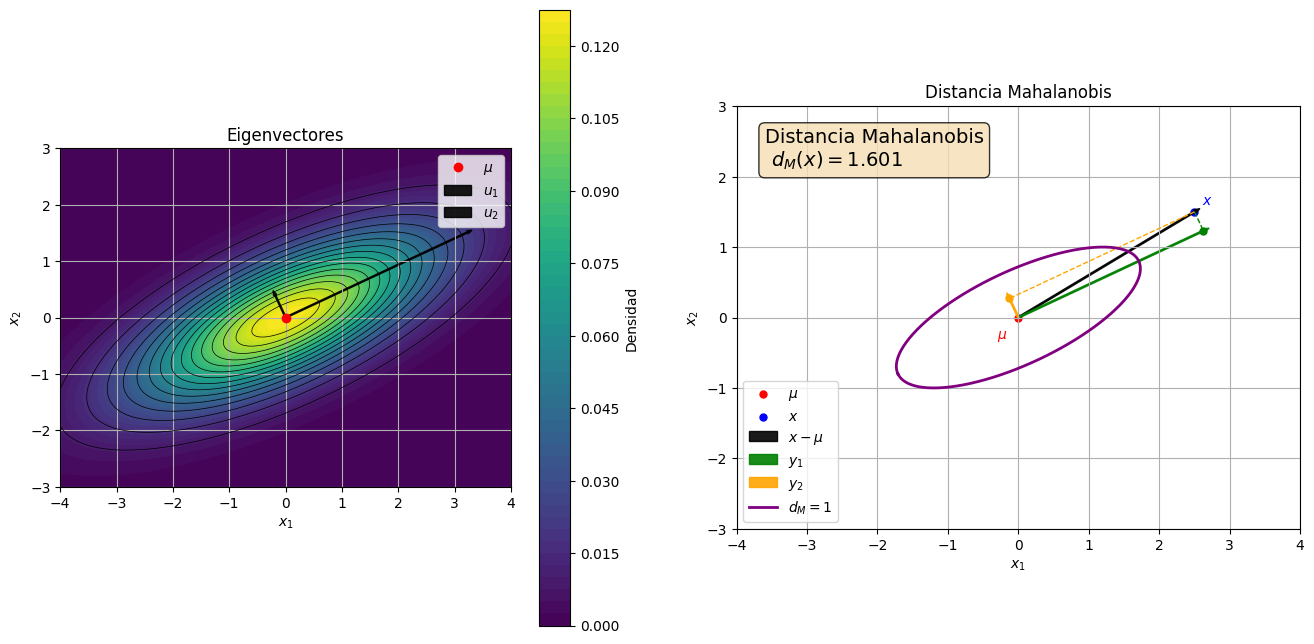

In [3]:
# Definimos el Vector de Medias y la Matriz de Covarianza

mu = np.array([0, 0])
sigma = np.array([[3, 1.2], [1.2, 1]])

# Definimos la Distribucion Normal Multivariante 

rv = multivariate_normal(mean = mu, cov = sigma) 

# Definimos el Dominio de la Distribucion Normal Multivariante

x = np.linspace(-4, 4, 1000) 
y = np.linspace(-4, 4, 1000) 

X, Y = np.meshgrid(x, y)

points = np.dstack((X, Y))

pdf = rv.pdf(points)

# Calculamos los Eigenvectores y los Eigenvalores de la Matriz de Covarianza (Los ordenamos por eigenvalores de mayor a menor)

eigvals, eigvecs = np.linalg.eigh(sigma)

order = eigvals.argsort()[::-1]

eigvals = eigvals[order]
eigvecs = eigvecs[:, order]

# Definimos el Punto de Estudio 

x_sample = np.array([2.5, 1.5])

# Definimos el Vector que se forma entre el Punto de Estudio y le Vector de Medias

x_vec = x_sample - mu

# Proyectamos el Vector a las direcciones dada por los eigenvectores 

x_proj = eigvecs.T @ x_vec

# Cálculo distancia de Mahalanobis (Es la Distancia Euclidiana pero tomando como referencia la direccion dada por los eigenvectores)

mahal_dist = np.sum((x_proj**2) / eigvals)
mahal_dist = np.sqrt(mahal_dist)

# Visualizamos 

colors = ['green', 'orange']

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

ax1 = axes[0]
ax2 = axes[1]

contour = ax1.contourf(x, y, pdf, levels = 50, cmap = 'viridis')
ax1.contour(x, y, pdf, colors = 'k', linewidths = 0.5, levels = 15)
ax1.plot(mu[0], mu[1], 'ro', label = r'$\mu$')

for i in range(len(eigvals)):

    vec = -eigvecs[:, i]
    length = eigvals[i]

    start = mu
    end = mu + length * vec
    ax1.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1], width = 0.02, color = 'black', alpha = 0.9, label = rf'$u_{i+1}$')

ax1.set_xlim(-4, 4)
ax1.set_ylim(-3, 3)
ax1.set_aspect('equal', adjustable = 'box')
ax1.set_title('Eigenvectores')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.grid(True)
ax1.legend()

fig.colorbar(contour, ax = ax1, label = 'Densidad')

ax2.scatter(*mu, color = 'red', s = 25, label = r'$\mu$')
ax2.scatter(*x_sample, color = 'blue', s = 25, label = r'$x$')
ax2.arrow(mu[0], mu[1], x_sample[0]-mu[0], x_sample[1]-mu[1], width = 0.02, color = 'black', alpha = 0.9, label = r'$x - \mu$')

ax2.text(mu[0] - 0.3, mu[1] - 0.3, r'$\mu$', color = 'red', fontsize = 10, fontweight= 'bold')
ax2.text(x_sample[0] + 0.1, x_sample[1] + 0.1, r'$x$', color = 'blue', fontsize = 10, fontweight = 'bold')

for i in range(2):
    
    vec = eigvecs[:, i]
    proj_vec = x_proj[i] * vec

    ax2.plot([x_sample[0], mu[0] + proj_vec[0]], [x_sample[1], mu[1] + proj_vec[1]], color = colors[i], linestyle = 'dashed', lw = 1)
    ax2.arrow(mu[0], mu[1], proj_vec[0]-mu[0], proj_vec[1]-mu[1], width = 0.02, color = colors[i], alpha = 0.9, label =  rf'$y_{i+1}$')
    ax2.scatter(mu[0] + proj_vec[0], mu[1] + proj_vec[1], color = colors[i], s = 25)

theta = np.linspace(0, 2*np.pi, 300)
circle = np.array([np.cos(theta), np.sin(theta)])
scale = np.sqrt(eigvals)
transform = eigvecs @ np.diag(scale)
ellipse = transform @ circle + mu.reshape(2,1)
ax2.plot(ellipse[0], ellipse[1], color = 'purple', lw = 2, label = '$d_M = 1$')

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.8)
ax2.text(0.05, 0.95, f'Distancia Mahalanobis\n $d_M(x) = {mahal_dist:.3f}$', transform = ax2.transAxes, fontsize = 14, verticalalignment = 'top', bbox = props)

ax2.set_xlim(-4, 4)
ax2.set_ylim(-3, 3)
ax2.set_aspect('equal', adjustable = 'box')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.grid(True)
ax2.legend()
ax2.set_title('Distancia Mahalanobis')

plt.show()

# **Maximum Likelihood Estimation de MVE**

La **probability density function** de una distribucion normal multivariante es la siguiente:

$$\mathcal{N}(x \mid \mu, \Sigma) = \frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)}$$ 

Definimos la **versomilitud**

$$L(\mu, \Sigma) = \prod_{i=1}^n \frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)}$$

Le aplicamos el logaritmo a la **verosimilitud**

$$LL(\mu, \Sigma) = \sum_{i=1}^n \log \left(\frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)}\right)$$
$$LL(\mu, \Sigma) = \sum_{i=1}^n \left[\log \left(\frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma|^{\frac{1}{2}}}\right) + \log \left(e^{-\frac{1}{2} (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)}\right)\right]$$
$$LL(\mu, \Sigma) = \sum_{i=1}^n  \left[- \frac{D}{2} \log(2 \pi) - \frac{1}{2} \log(|\Sigma|) - \frac{1}{2} (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)\right]$$
$$LL(\mu, \Sigma) = - \frac{n D}{2} \log(2 \pi) - \frac{n}{2} \log(|\Sigma|) - \frac{1}{2} \sum_i^n (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)$$

**Derivamos Pracialmente Respecto a los Parametros** 

* Parametro: $\mu$ 

$$LL(\mu, \Sigma) = - \frac{1}{2} \sum_{i=1}^n \left[x_i^T \Sigma^{-1} x_i - \mu^T \Sigma^{-1} x_i - x_i^T \Sigma^{-1} \mu + \mu^T \Sigma^{-1} \mu\right]$$
$$LL(\mu, \Sigma) = - \frac{1}{2} \sum_{i=1}^n \left[\mu^T \Sigma^{-1} \mu - 2 x_i^T \Sigma^{-1} \mu\right]$$

$$\frac{\partial LL(\mu, \Sigma)}{\partial \mu} = - \frac{1}{2} \sum_{i=1}^n \left[d\mu^T \Sigma^{-1} \mu + \mu^T \Sigma^{-1} d\mu - 2 x_i^T \Sigma^{-1} d\mu\right]$$
$$\frac{\partial LL(\mu, \Sigma)}{\partial \mu} = - \frac{1}{2} \sum_{i=1}^n \left[2 \mu^T \Sigma^{-1} d\mu - 2 x_i^T \Sigma^{-1} d\mu\right]$$
$$\frac{\partial LL(\mu, \Sigma)}{\partial \mu} = \sum_{i=1}^n \left[x_i^T \Sigma^{-1} d\mu - \mu^T \Sigma^{-1} d\mu\right]$$

$$\nabla_\mu^T = \sum_{i=1}^n \left[x_i^T \Sigma^{-1} - \mu^T \Sigma^{-1}\right]$$
$$\nabla_\mu = \sum_{i=1}^n \left[\Sigma^{-1} x_i - \Sigma^{-1} \mu\right]$$
$$\nabla_\mu = \sum_{i=1}^n \Sigma^{-1} x_i - n \Sigma^{-1} \mu$$


* Parametro: $\Sigma$ 

$$LL(\mu, \Sigma) = - \frac{n}{2} \log(|\Sigma|) - \frac{1}{2} \sum_{i=1}^n (x_i - \mu)^T \Sigma^{-1} (x_i - \mu)$$
$$LL(\mu, \Sigma) = - \frac{n}{2} \text{Tr}\left(\text{Ln}\left(\Sigma\right)\right) - \frac{1}{2} \sum_{i=1}^n \text{Tr}\left[(x_i - \mu)^T \Sigma^{-1} (x_i - \mu)\right]$$
$$LL(\mu, \Sigma) = - \frac{n}{2} \text{Tr}\left(\text{Ln}\left(\Sigma\right)\right) - \frac{1}{2} \sum_{i=1}^n \text{Tr}\left[(x_i - \mu) (x_i - \mu)^T \Sigma^{-1}\right]$$
$$\frac{\partial LL(\mu, \Sigma)}{\partial \Sigma} = - \frac{n}{2} \text{Tr}\left(\frac{d\Sigma}{\Sigma}\right) - \frac{1}{2} \sum_{i=1}^n \text{Tr}\left[(x_i - \mu) (x_i - \mu)^T d\Sigma^{-1}\right]$$
$$\frac{\partial LL(\mu, \Sigma)}{\partial \Sigma} = - \frac{n}{2} \text{Tr}\left(\Sigma^{-1} d\Sigma\right) - \frac{1}{2} \sum_{i=1}^n \text{Tr}\left[(x_i - \mu) (x_i - \mu)^T - \Sigma^{-1} d\Sigma \Sigma^{-1}\right]$$
$$\frac{\partial LL(\mu, \Sigma)}{\partial \Sigma} = - \frac{n}{2} \text{Tr}\left(\Sigma^{-1} d\Sigma\right) + \frac{1}{2} \sum_{i=1}^n \text{Tr}\left[(x_i - \mu) (x_i - \mu)^T \Sigma^{-1} d\Sigma \Sigma^{-1}\right]$$
$$\frac{\partial LL(\mu, \Sigma)}{\partial \Sigma} = - \frac{n}{2} \text{Tr}\left(\Sigma^{-1} d\Sigma\right) + \frac{1}{2} \sum_{i=1}^n \text{Tr}\left[\Sigma^{-1} (x_i - \mu) (x_i - \mu)^T \Sigma^{-1} d\Sigma \right]$$

$$\nabla_\Sigma^T = - \frac{n}{2} \Sigma^{-1} + \frac{1}{2} \sum_{i=1}^n \Sigma^{-1} (x_i - \mu) (x_i - \mu)^T \Sigma^{-1}$$
$$\nabla_\Sigma = - \frac{n}{2} \Sigma^{-1} + \frac{1}{2} \sum_{i=1}^n \Sigma^{-1} (x_i - \mu) (x_i - \mu)^T \Sigma^{-1}$$

Artificios 

Debido a que la inversa de la matriz de covarianza es simetrica entonces $A^{-T} = A^{-1}$ por ende en este caso $\nabla^{T} = \nabla$

El valor absoluto de una matriz es su determinante

$$|\Sigma| = \text{det} \left(\Sigma\right) = \text{e}^{\text{Tr}\left(\text{Ln}\left(\Sigma\right)\right)}$$ 
$$\log |\Sigma| = \log \left(\text{e}^{\text{Tr}\left(\text{Ln}\left(\Sigma\right)\right)}\right)$$ 
$$\log |\Sigma| = \text{Tr}\left(\text{Ln}\left(\Sigma\right)\right)$$ 
$$d\log |\Sigma| = \text{Tr}\left(\frac{d\Sigma}{\Sigma}\right)$$ 
$$d\log |\Sigma| = \text{Tr}\left(\Sigma^{-1} d\Sigma\right)$$ 

Se utiliza un artificio para calcular el diferencial de la inversa de la matriz de covarianza

$$\Sigma^{-1} \Sigma = I$$
$$d\Sigma^{-1} \Sigma + \Sigma^{-1} d\Sigma  = 0$$
$$d\Sigma^{-1} = - \Sigma^{-1} d\Sigma \Sigma^{-1}$$

**Máxima verosimilitud** 

* Parametro: $\mu$ 

$$\hat{\mu}_{MLE} = \text{argmax}_{\mu} LL(\mu, \Sigma) \rightarrow \frac{\partial LL(\mu, \Sigma)}{\partial \mu} = 0$$

$$0 = \sum_{i=1}^n \Sigma^{-1} x_i - n \Sigma^{-1} \mu$$ 
$$n \Sigma^{-1} \mu = \sum_{i=1}^n \Sigma^{-1} x_i$$
$$ \mu = \frac{1}{n} \sum_{i=1}^n x_i$$

* Parametro: $\sigma^2$ 

$$\hat{\Sigma}_{MLE} = \text{argmax}_{\Sigma} LL(\mu, \Sigma) \rightarrow \frac{\partial LL(\mu, \Sigma)}{\partial \Sigma} = 0$$

$$0 = - \frac{n}{2} \Sigma^{-1} + \frac{1}{2} \sum_{i=1}^n \Sigma^{-1} (x_i - \mu) (x_i - \mu)^T \Sigma^{-1}$$ 
$$n \Sigma^{-1} = \sum_{i=1}^n \Sigma^{-1} (x_i - \mu) (x_i - \mu)^T \Sigma^{-1}$$ 
$$n \Sigma\Sigma^{-1}\Sigma = \sum_{i=1}^n \Sigma\Sigma^{-1} (x_i - \mu) (x_i - \mu)^T \Sigma^{-1}\Sigma$$ 
$$\Sigma = \frac{1}{n} \sum_{i=1}^n (x_i - \mu) (x_i - \mu)^T = \frac{1}{n} \sum_{i=1}^n x_i x_i^T - \mu \mu^T $$ 

**Nota:** El artificio para estimar el parametro de la matriz de covarianza es que la traza de un escalar es el escalar, pero esto nos permite mover el diferencial y hace todo mas sencillo

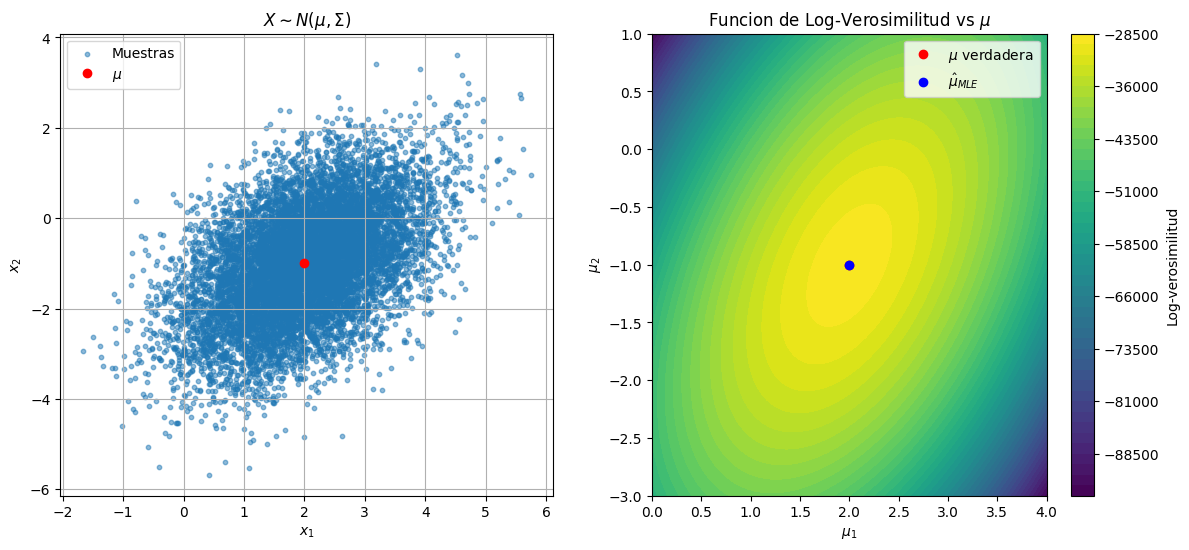

In [4]:
# Definimos el Vector de Medias y la Matriz de Covarianza

mu = np.array([2, -1])
sigma = np.array([[1.0, 0.6], [0.6, 1.5]])

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

n_samples = 10000
samples = np.random.multivariate_normal(mean = mu, cov = sigma, size = n_samples)

# Definimos el Estimador de Parametro 

mu_mle = np.mean(samples, axis = 0)

# Definimos la Funcion Log-Verosimilitud 

D = sigma.shape[1]
sigma_inv = np.linalg.inv(sigma)
log_det_sigma = np.log(np.linalg.det(sigma))

mu1_values = np.linspace(mu[0] - 2, mu[0] + 2, 200)
mu2_values = np.linspace(mu[1] - 2, mu[1] + 2, 200)

Mu1, Mu2 = np.meshgrid(mu1_values, mu2_values)

log_likelihood_grid = np.zeros_like(Mu1)

for i in range(Mu1.shape[0]):
    for j in range(Mu1.shape[1]):

        mu_candidate = np.array([Mu1[i, j], Mu2[i, j]])
        diff = samples - mu_candidate 
        maha = np.einsum('ni,ij,nj->n', diff, sigma_inv, diff)

        log_likehood = - (n_samples * D / 2) * np.log(2 * np.pi) - (n_samples / 2) * log_det_sigma - 0.5 * np.sum(maha)
        log_likelihood_grid[i, j] = log_likehood

# Visualizamos 

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

axs[0].scatter(samples[:, 0], samples[:, 1], s = 10, alpha = 0.5, label = 'Muestras')
axs[0].plot(mu[0], mu[1], 'ro', label = r'$\mu$')
axs[0].set_title(r'$X \sim N(\mu, \Sigma)$')
axs[0].set_xlabel(r'$x_1$')
axs[0].set_ylabel(r'$x_2$')
axs[0].legend()
axs[0].grid(True)

cs = axs[1].contourf(Mu1, Mu2, log_likelihood_grid, levels = 50, cmap = 'viridis')
axs[1].plot(mu[0], mu[1], 'ro', label = r'$\mu$ verdadera')
axs[1].plot(mu_mle[0], mu_mle[1], 'bo', label = r'$\hat{\mu}_{MLE}$')
axs[1].set_title(r'Funcion de Log-Verosimilitud vs $\mu$')
axs[1].set_xlabel(r'$\mu_1$')
axs[1].set_ylabel(r'$\mu_2$')
axs[1].legend()
fig.colorbar(cs, ax = axs[1], label = 'Log-verosimilitud')

plt.show()

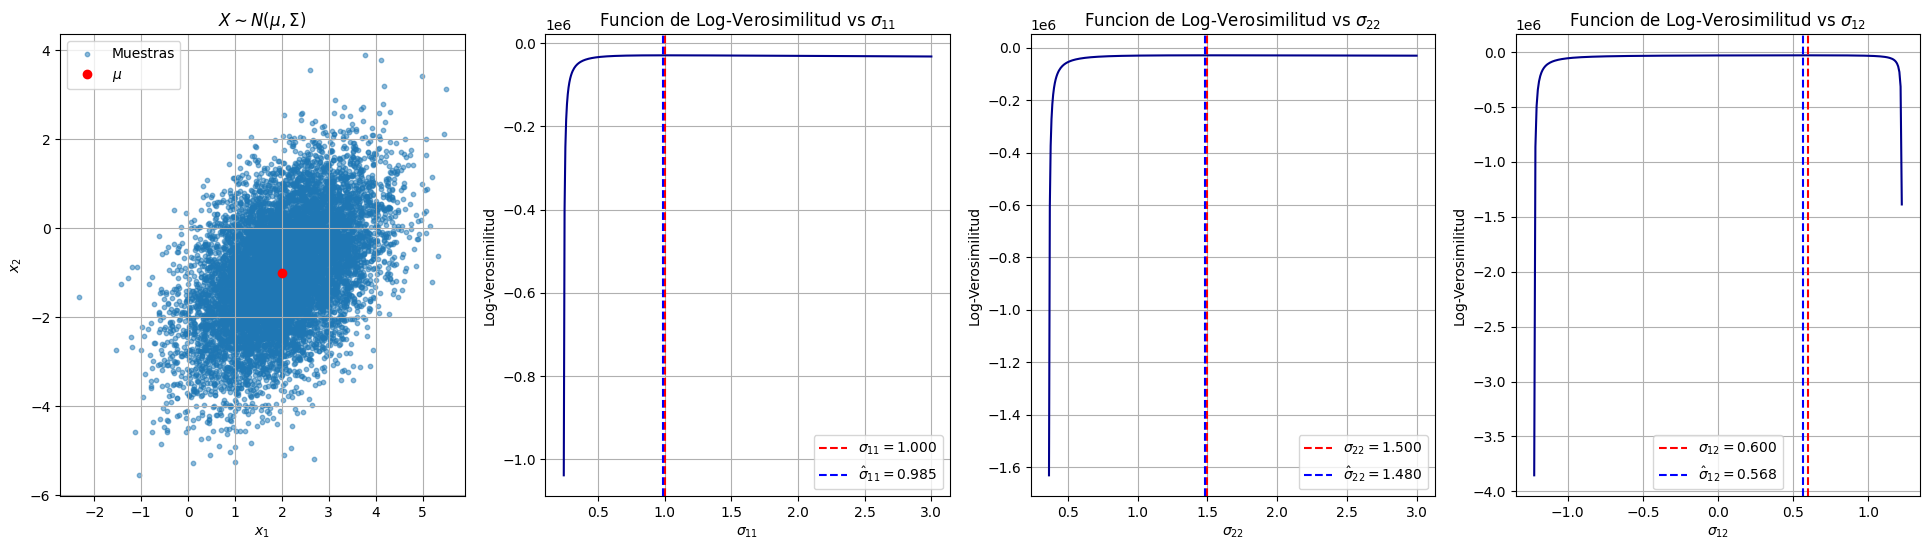

In [5]:
# Definimos el Vector de Medias y la Matriz de Covarianza

mu = np.array([2, -1])
sigma = np.array([[1.0, 0.6], [0.6, 1.5]])

# Generamos 10.000 Muestras Provenientes de la Distribucion (Simulamos el concepto IID)

n_samples = 10000
samples = np.random.multivariate_normal(mean = mu, cov = sigma, size = n_samples)

# Definimos el Estimador de Parametro 

sigma_mle = np.cov(samples, rowvar = False, bias = True)

# Funcion para Calcular Log-Verosimilitud para cada Parametro 

def calculate_log_likelihood(mu, sigma, samples):

    n, D = samples.shape
    sigma_inv = np.linalg.inv(sigma)
    log_det_sigma = np.log(np.linalg.det(sigma))
    
    diff = samples - mu
    maha = np.einsum('ni,ij,nj->n', diff, sigma_inv, diff)
    
    log_likehood = - (n * D / 2) * np.log(2 * np.pi) - (n / 2) * log_det_sigma - 0.5 * np.sum(maha)

    return log_likehood

# Definimos la Funcion Log-Verosimilitud 

sigma11_vals = np.linspace(0.01, 3, 500)
sigma22_vals = np.linspace(0.01, 3, 500)
sigma12_vals = np.linspace(-2, 2, 500)

log_likehood_11 = []
log_likehood_22 = []
log_likehood_12 = []

for val in sigma11_vals:
    cov = np.array([[val, sigma[0,1]], [sigma[1,0], sigma[1,1]]])

    try:
        rv = multivariate_normal(mean = mu, cov = cov)
        log_likehood = calculate_log_likelihood(mu, cov, samples)

        log_likehood_11.append(log_likehood)
    except:
        log_likehood_11.append(-np.inf)

for val in sigma22_vals:
    cov = np.array([[sigma[0, 0], sigma[0,1]], [sigma[1,0], val]])

    try:
        rv = multivariate_normal(mean = mu, cov = cov)
        log_likehood = calculate_log_likelihood(mu, cov, samples)

        log_likehood_22.append(log_likehood)
    except:
        log_likehood_22.append(-np.inf)

for val in sigma12_vals:
    cov = np.array([[sigma[0, 0], val], [val, sigma[1, 1]]])

    try:
        rv = multivariate_normal(mean = mu, cov = cov)
        log_likehood = calculate_log_likelihood(mu, cov, samples)

        log_likehood_12.append(log_likehood)
    except:
        log_likehood_12.append(-np.inf)

# Visualizamos 

fig, axs = plt.subplots(1, 4, figsize = (24, 6))

axs[0].scatter(samples[:, 0], samples[:, 1], s = 10, alpha = 0.5, label = 'Muestras')
axs[0].plot(mu[0], mu[1], 'ro', label = r'$\mu$')
axs[0].set_title(r'$X \sim N(\mu, \Sigma)$')
axs[0].set_xlabel(r'$x_1$')
axs[0].set_ylabel(r'$x_2$')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(sigma11_vals, log_likehood_11, color = 'darkblue')
axs[1].axvline(x = sigma[0,0], color = 'red', linestyle = '--', label = fr'$\sigma_{{11}} = {sigma[0, 0]:.3f}$')
axs[1].axvline(x = sigma_mle[0,0], color = 'blue', linestyle = '--', label = fr'$\hat{{\sigma}}_{{11}} = {sigma_mle[0, 0]:.3f}$')
axs[1].set_title(r'Funcion de Log-Verosimilitud vs $\sigma_{11}$')
axs[1].set_xlabel(r'$\sigma_{11}$')
axs[1].set_ylabel('Log-Verosimilitud')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(sigma22_vals, log_likehood_22, color = 'darkblue')
axs[2].axvline(x = sigma[1,1], color = 'red', linestyle = '--', label = fr'$\sigma_{{22}} = {sigma[1, 1]:.3f}$')
axs[2].axvline(x = sigma_mle[1,1], color = 'blue', linestyle = '--', label = fr'$\hat{{\sigma}}_{{22}} = {sigma_mle[1, 1]:.3f}$')
axs[2].set_title(r'Funcion de Log-Verosimilitud vs $\sigma_{22}$')
axs[2].set_xlabel(r'$\sigma_{22}$')
axs[2].set_ylabel('Log-Verosimilitud')
axs[2].legend()
axs[2].grid(True)

axs[3].plot(sigma12_vals, log_likehood_12, color = 'darkblue')
axs[3].axvline(x = sigma[0,1], color = 'red', linestyle = '--', label = fr'$\sigma_{{12}} = {sigma[0, 1]:.3f}$')
axs[3].axvline(x = sigma_mle[0,1], color = 'blue', linestyle = '--', label = fr'$\hat{{\sigma}}_{{12}} = {sigma_mle[0, 1]:.3f}$')
axs[3].set_title(r'Funcion de Log-Verosimilitud vs $\sigma_{12}$')
axs[3].set_xlabel(r'$\sigma_{12}$')
axs[3].set_ylabel('Log-Verosimilitud')
axs[3].legend()
axs[3].grid(True)

plt.show()